Classification Report:
               precision    recall  f1-score   support

  Non-Urgent       1.00      0.40      0.57         5
      Urgent       0.25      1.00      0.40         1

    accuracy                           0.50         6
   macro avg       0.62      0.70      0.49         6
weighted avg       0.88      0.50      0.54         6



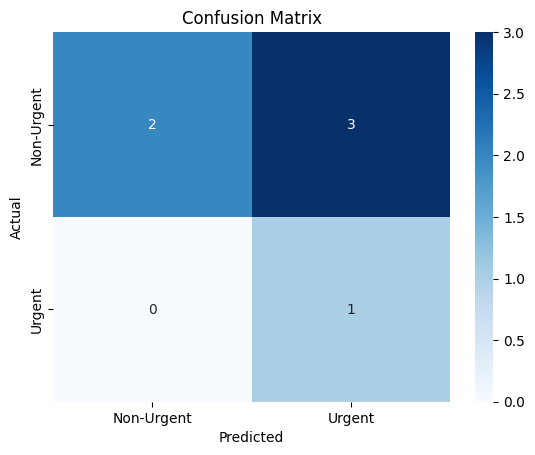

In [7]:
import torch
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def analyze_model_performance(true_labels, predictions):
    # Print classification report
    report = classification_report(true_labels, predictions, target_names=['Non-Urgent', 'Urgent'])
    print("Classification Report:\n", report)

    # Generate confusion matrix
    cm = confusion_matrix(true_labels, predictions)
    
    # Plot confusion matrix
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Non-Urgent', 'Urgent'], yticklabels=['Non-Urgent', 'Urgent'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix')
    plt.show()


# Load the saved predictions and labels
saved_data = torch.load('outputs/sampled_data/exp_1/model_predictions.pt')
predictions = saved_data['predictions']
true_labels = saved_data['true_labels']

# Analyze the model performance
analyze_model_performance(true_labels, predictions)